In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
plt.rc('figure', figsize=(14, 6))
import folium

In [35]:
dados = pd.read_csv('dados/Registered Syrian Refugees by Date.csv', sep=';')
dados

,sep=,Unnamed: 1
0,data_date,individuals
1,2012-01-15,9500
2,2012-02-29,10658
3,2012-04-18,23955
4,2012-04-23,23702
...,...,...
635,2022-12-22,3543837
636,2022-12-31,3535898
637,2023-01-12,3522036
638,2023-01-19,3513776


In [36]:
dados1 = dados.rename(columns={'sep=': 'Date', 'Unnamed: 1': 'Refuguiados' })

In [37]:
dados1.drop(0, axis=0, inplace=True)

In [38]:
dados1

,Date,Refuguiados
1,2012-01-15,9500
2,2012-02-29,10658
3,2012-04-18,23955
4,2012-04-23,23702
5,2012-04-26,23343
...,...,...
635,2022-12-22,3543837
636,2022-12-31,3535898
637,2023-01-12,3522036
638,2023-01-19,3513776


In [39]:
dados1['Date'] = pd.to_datetime(dados1['Date'])
dados1['Refuguiados'] = pd.to_numeric(dados1['Date'])

<StemContainer object of 3 artists>

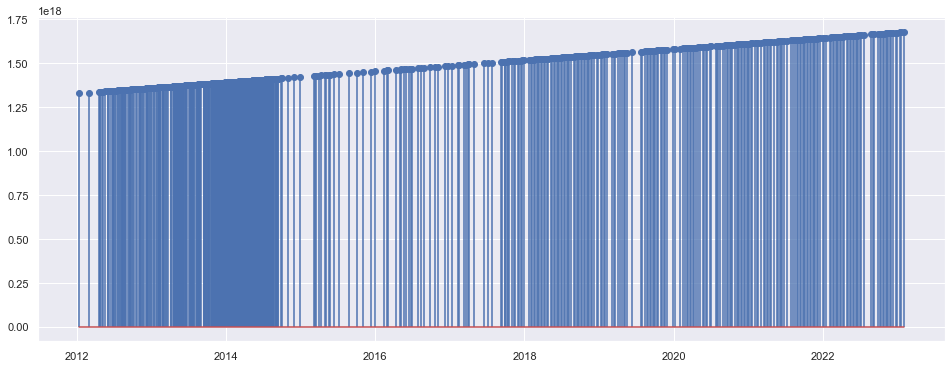

In [40]:
fig = plt.figure(figsize=(14, 5))
eixo = fig.add_axes([0,0, 0.9, 0.9])
eixo.stem(dados1['Date'], dados1['Refuguiados'])

In [41]:
import datetime

(19308.0, 19390.0)

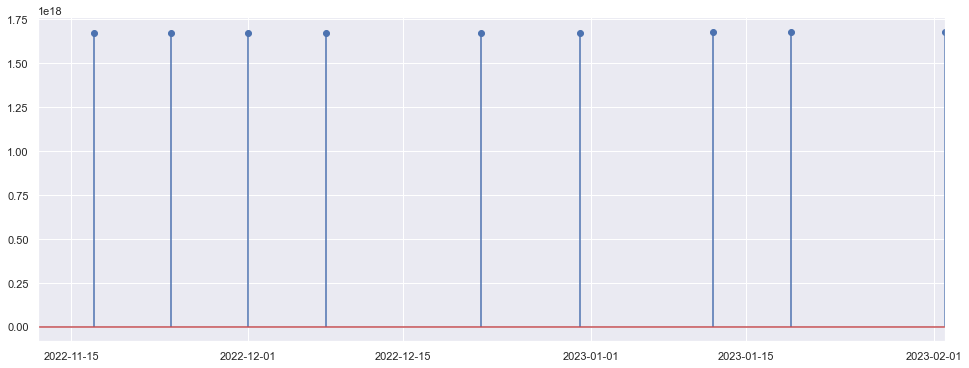

In [42]:
fig = plt.figure(figsize=(14, 5))
eixo = fig.add_axes([0,0, 0.9, 0.9])
eixo.stem(dados1['Date'], dados1['Refuguiados'])

eixo.set_xlim(datetime.datetime(2022,11,12), datetime.datetime(2023,2,2))

### Testando a biblioteca Folium

In [43]:
pip install folium

In [44]:
# Coordenadas dos pontos
lats = np.random.normal(36, 1, 100) # latitude
lons = np.random.normal(37, 1, 100) # longitude

# Cria um mapa centrado nas coordenadas médias
map = folium.Map(location=[np.mean(lats), np.mean(lons)], zoom_start=8)

# Adiciona marcadores para cada ponto
for lat, lon in zip(lats, lons):
    folium.Marker(location=[lat, lon]).add_to(map)

# Mostra o mapa
map

In [45]:
dados1= pd.read_csv('dados/hotosm_tur_destroyed_buildings_polygons_csv.csv')
dados1

,osm_id,building,damage_date,addr_street,destroyed_building,source,addr_full,damage_event,addr_city,addr_housenumber,name,damage_type,longitude,latitude,geom_type
0,1147164787,NaN,2023-02-06,NaN,yes,CopernicusEMS,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.365865,36.472146,POLYGON
1,1147166052,NaN,2023-02-06,NaN,yes,CopernicusEMS,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.352694,36.493447,POLYGON
2,1147170022,NaN,2023-02-06,NaN,yes,CopernicusEMS,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.353101,36.491821,POLYGON
3,1147174340,NaN,2023-02-06,NaN,yes,CopernicusEMS,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.358288,36.496162,POLYGON
4,1147174347,NaN,2023-02-06,NaN,yes,CopernicusEMS,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.358789,36.496386,POLYGON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,1139190966,NaN,2023-02-06,NaN,yes,cscrs,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.630427,37.022934,POLYGON
3302,1139524307,NaN,2023-02-06,NaN,yes,cscrs,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.629054,37.025857,POLYGON
3303,1139658748,NaN,2023-02-06,NaN,yes,cscrc,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.629579,37.024958,POLYGON
3304,1139274714,NaN,2023-02-06,NaN,yes,cscrs,NaN,#TürkiyeEQ060223,NaN,NaN,NaN,earthquake,36.631257,37.027352,POLYGON


### Plotando com os dados de edificios destruidos na Turquia

In [46]:
longi = dados1['longitude']
lati = dados1['latitude']

In [47]:
lats = lati # latitude
lons = longi # longitude

# Cria um mapa centrado nas coordenadas médias
map = folium.Map(location=[np.mean(lats), np.mean(lons)], zoom_start=9)

folium.TileLayer('cartodbpositron').add_to(map)
folium.TileLayer('Stamen Terrain').add_to(map)
folium.TileLayer('stamentoner').add_to(map)

# Adiciona marcadores para cada ponto
for lat, lon in zip(lats, lons):
    folium.Marker(location=[lat, lon], icon=folium.Icon(color = "blue", radius=50, icon="flag")).add_to(map)

folium.LayerControl().add_to(map)
map